<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [354]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [355]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-06-15 19:31:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-06-15 19:31:17 (11.5 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [356]:
df = pd.read_csv('loan_train.csv')
df_untouched = df.copy()
df.describe(include='all')

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,298.750000,298.750000,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


In [357]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [358]:
df.shape

(346, 10)

### Convert to date time object 

In [359]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.describe(include='all')

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,2016-09-11 00:00:00,2016-10-10 00:00:00,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
first,NaN,NaN,NaN,NaN,NaN,2016-09-08 00:00:00,2016-09-16 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2016-09-14 00:00:00,2016-11-12 00:00:00,NaN,NaN,NaN
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [360]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [361]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



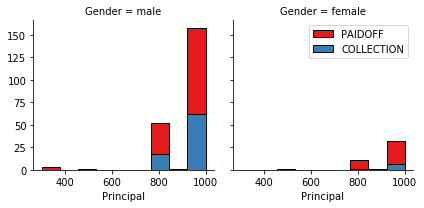

In [362]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

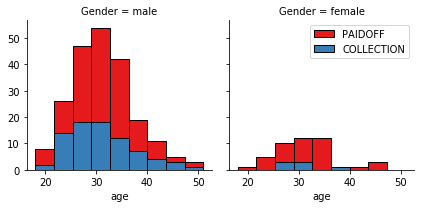

In [363]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

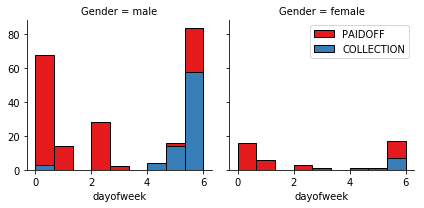

In [364]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

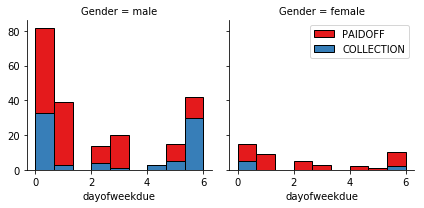

In [365]:
df['dayofweekdue'] = df['due_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweekdue', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [366]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['weekenddue'] = df['dayofweekdue'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,dayofweekdue,weekend,weekenddue
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,4,0,1
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,4,0,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,3,0,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,5,1,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,5,1,1


## Convert Categorical features to numerical values

Lets look at gender:

In [367]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [368]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,dayofweekdue,weekend,weekenddue
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,4,0,1
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,4,0,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,3,0,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,5,1,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,5,1,1


## One Hot Encoding  
#### How about education?

In [369]:
df.groupby(['education'])['loan_status'].value_counts()

education             loan_status
Bechalor              PAIDOFF         33
                      COLLECTION      11
High School or Below  PAIDOFF        112
                      COLLECTION      39
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               PAIDOFF        114
                      COLLECTION      35
Name: loan_status, dtype: int64

#### Feature befor One Hot Encoding

In [370]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [371]:
Feature = df[['Principal','terms','age','Gender','weekend', 'weekenddue', 'dayofweek', 'dayofweekdue']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,weekenddue,dayofweek,dayofweekdue,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,3,4,0,1,0
1,1000,30,33,1,0,1,3,4,1,0,0
2,1000,15,27,0,0,0,3,3,0,0,1
3,1000,30,28,1,1,1,4,5,0,0,1
4,1000,30,29,0,1,1,4,5,0,0,1


### Feature selection

Lets defind feature sets, X:

In [372]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,weekenddue,dayofweek,dayofweekdue,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,3,4,0,1,0
1,1000,30,33,1,0,1,3,4,1,0,0
2,1000,15,27,0,0,0,3,3,0,0,1
3,1000,30,28,1,1,1,4,5,0,0,1
4,1000,30,29,0,1,1,4,5,0,0,1


What are our lables?

In [373]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [374]:
X= preprocessing.StandardScaler().fit_transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
         1.43594808, -0.26122054,  0.667101  , -0.38170062,  1.13639374,
        -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         1.43594808, -0.26122054,  0.667101  ,  2.61985426, -0.87997669,
        -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.69640401, -0.26122054,  0.26498089, -0.38170062, -0.87997669,
         1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
         1.43594808,  0.12175534,  1.06922112, -0.38170062, -0.87997669,
         1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
         1.43594808,  0.12175534,  1.06922112, -0.38170062, -0.87997669,
         1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

**Before proceeding with algorithm development, first we get back to 'Feature' DataFrame and split it into train and validation sets**

To prevent data leakage from validation to train sets, we will use the initial Feature DataFrame as X, and split it into train and validation
We also substitute the PAIDOFF and COLLECTION values in y labels into 1 and 0 respectively.

In [375]:
X = Feature
y = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0])
print(y.head())
X.head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64


,Principal,terms,age,Gender,weekend,weekenddue,dayofweek,dayofweekdue,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,3,4,0,1,0
1,1000,30,33,1,0,1,3,4,1,0,0
2,1000,15,27,0,0,0,3,3,0,0,1
3,1000,30,28,1,1,1,4,5,0,0,1
4,1000,30,29,0,1,1,4,5,0,0,1


In [376]:
X.corrwith(y)

Principal              -0.076309
terms                  -0.102102
age                     0.027479
Gender                  0.110877
weekend                -0.436145
weekenddue             -0.169885
dayofweek              -0.408097
dayofweekdue           -0.112060
Bechalor               -0.001276
High School or Below   -0.019798
college                 0.027480
dtype: float64

In [377]:
X.corr()

,Principal,terms,age,Gender,weekend,weekenddue,dayofweek,dayofweekdue,Bechalor,High School or Below,college
Principal,1.000000,0.521876,-0.060893,-0.005134,0.089006,-0.266865,0.102318,-0.241972,0.022212,0.011206,-0.021506
terms,0.521876,1.000000,-0.064762,-0.032399,0.084842,-0.446267,0.107344,-0.384815,-0.057337,0.101787,-0.052172
age,-0.060893,-0.064762,1.000000,-0.010519,0.000431,0.084675,0.036584,0.094846,0.057065,0.066836,-0.131585
Gender,-0.005134,-0.032399,-0.010519,1.000000,-0.079157,-0.034193,-0.072690,-0.028405,0.082229,-0.043927,-0.006420
weekend,0.089006,0.084842,0.000431,-0.079157,1.000000,0.477218,0.964505,0.319508,0.016430,-0.064819,0.044184
weekenddue,-0.266865,-0.446267,0.084675,-0.034193,0.477218,1.000000,0.417583,0.932954,0.048651,-0.103328,0.053993
dayofweek,0.102318,0.107344,0.036584,-0.072690,0.964505,0.417583,1.000000,0.308679,0.039829,-0.071406,0.034357
dayofweekdue,-0.241972,-0.384815,0.094846,-0.028405,0.319508,0.932954,0.308679,1.000000,0.024399,-0.104275,0.070847
Bechalor,0.022212,-0.057337,0.057065,0.082229,0.016430,0.048651,0.039829,0.024399,1.000000,-0.335888,-0.331958
High School or Below,0.011206,0.101787,0.066836,-0.043927,-0.064819,-0.103328,-0.071406,-0.104275,-0.335888,1.000000,-0.765299


## Here we define a preprocessing function

In [378]:
def preprocess(X, need_y=False):
    df = X.copy()
    df['due_date'] = pd.to_datetime(df['due_date'])
    df['effective_date'] = pd.to_datetime(df['effective_date'])

    df['dayofweek'] = df['effective_date'].dt.dayofweek

    df['dayofweekdue'] = df['due_date'].dt.dayofweek

    df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
    df['weekenddue'] = df['dayofweekdue'].apply(lambda x: 1 if (x>3)  else 0)

    df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)

    Feature = df[['Principal','terms','age','Gender','weekend', 'weekenddue', 'dayofweek', 'dayofweekdue']]
    Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
    Feature = Feature.drop(['Master or Above'], axis = 1)

    X = Feature
    if need_y:
        y = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0])
        return X, y
    else:
        return X
    
    
def scale(X, scaler=None):
    if scaler:
        X_scaled = scaler.transform(X)
        return X_scaled
    else:
        scaler = preprocessing.StandardScaler()
        X_scaled = scaler.fit_transform(X)
        return X_scaled, scaler
        

## Here we define a helper function for evaluation

In [379]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

measures = {'Jaccard': jaccard_similarity_score, 'F1-score': f1_score, 'Log Loss': log_loss}

def measure_the_classifier(y_pred, y_true):
    result = {}
    for meas_name, meas_func in measures.items():
        result[meas_name] = round(meas_func(y_pred, y_true), 3)
    return result


In [381]:
from sklearn.model_selection import train_test_split
X, y = preprocess(df_untouched, need_y=True)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=4)

X_train, scaler = scale(X_train)
X_valid = scaler.transform(X_valid)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [382]:
from sklearn.neighbors import KNeighborsClassifier

In [383]:
knn_results = []
max_k = 30
for k in range(1, max_k+1):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_valid)
    knn_result = measure_the_classifier(y_pred_knn, y_valid)
    knn_results.append(knn_result)

Best K based on f1_score is:27, f1_score:0.887
{'Jaccard': 0.8, 'F1-score': 0.887, 'Log Loss': 6.908}


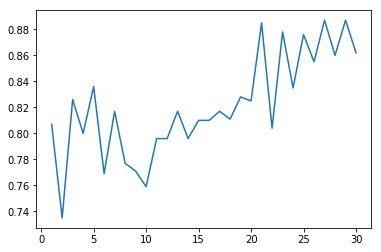

In [384]:
f1_res = [i['F1-score'] for i in knn_results]
best_k = 0
best_k_result = -1
for i in f1_res:
    if i > best_k_result:
        best_k = f1_res.index(i) + 1
        best_k_result = i
print(f'Best K based on f1_score is:{best_k}, f1_score:{best_k_result}')
plt.plot(range(1, max_k+1), f1_res)

# Our algorithm performs very good in training set for k = 3 to 5, 
# but I decided to change it to 12, because my intuition tells me
# that for better performance we have to use more instances than 3 or 5.
# also good performance here can be related to the current separation of
# test and train sets.
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_valid)
knn_result = measure_the_classifier(y_pred_knn, y_valid)
print(knn_result)

# Decision Tree

In [385]:
from sklearn.tree import DecisionTreeClassifier

In [390]:
tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=42)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [391]:
y_pred_tree = tree_classifier.predict(X_valid)
tree_result = measure_the_classifier(y_pred_tree, y_valid)
print(tree_result)

{'Jaccard': 0.671, 'F1-score': 0.785, 'Log Loss': 11.349}


# Support Vector Machine

In [392]:
from sklearn import svm

In [393]:
svm_classifier = svm.SVC(kernel='rbf', gamma='auto', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [394]:
y_pred_svm = svm_classifier.predict(X_valid)
svm_result = measure_the_classifier(y_pred_svm, y_valid)
print(svm_result)

{'Jaccard': 0.757, 'F1-score': 0.852, 'Log Loss': 8.388}


# Logistic Regression

In [395]:
from sklearn.linear_model import LogisticRegression

In [396]:
logistic_classifier = LogisticRegression(C=0.01, solver='liblinear')
logistic_classifier.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [397]:
y_pred_logist = logistic_classifier.predict(X_valid)
logist_result = measure_the_classifier(y_pred_logist, y_valid)
print(logist_result)

{'Jaccard': 0.629, 'F1-score': 0.745, 'Log Loss': 12.829}


# Model Evaluation using Test set

In [398]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [399]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-06-15 19:34:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-06-15 19:34:36 (441 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [400]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [401]:
X_test, y_test = preprocess(test_df, need_y=True)
X_test = scaler.transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [402]:
results = {}
models = {'KNN': knn_classifier, 'Decision Tree': tree_classifier, 'SVM': svm_classifier, 'Logistic Regression': logistic_classifier}
for model_name, model in models.items():
    new_pred = model.predict(X_test)
    curr_result = measure_the_classifier(new_pred, y_test)
    results[model_name] = curr_result

In [403]:
report = pd.DataFrame(results)
report = report.transpose()
report

,F1-score,Jaccard,Log Loss
KNN,0.870,0.778,7.675
Decision Tree,0.831,0.722,9.594
SVM,0.876,0.796,7.036
Logistic Regression,0.805,0.722,9.594


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>